# Part 2. Principal Component Analysis (PCA)
In this part of the lab, we will combine principal component analysis with K-means to see if we can find a better clustering for the iris dataset.

As before, let's load again the iris dataset (no plotting this time)

In [1]:
from sklearn.datasets import load_iris
import seaborn as sns
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import utils

iris = load_iris(as_frame=True)

### Task 1 - PCA
Your task is to code the PCA algorithm's covariance method, as seen in the course. Please complete the function below as requested.

In [2]:
import numpy as np

def pca(X, n_components):
    """
    Performs Principal Component Analysis (PCA).

    Args:
        X: Input data (numpy array).
        n_components: Number of principal components to keep.

    Returns:
        X_pca: Data transformed into the principal component space.
        eigenvectors: Principal component eigenvectors.
    """
    # 1. Center the data
    X_centered = X - np.mean(X, axis=0)

    # 2. Calculate the covariance matrix
    covariance_matrix = np.cov(X_centered, rowvar=False)

    # 3. Compute eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # 4. Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # 5. Select the top 'n_components' eigenvectors
    selected_eigenvectors = eigenvectors[:, :n_components]

    # 6. Transform the data
    X_pca = np.dot(X_centered, selected_eigenvectors)

    return X_pca, selected_eigenvectors


Now, you will use your coded PCA to apply PCA to the iris dataset. You will keep the top 2 components.

In [3]:
# Number of principal components
n_components = 2

# Extract the features from the iris dataset
X = iris.data  # The feature matrix

# Perform PCA using the function you implemented
X_pca, eigenvectors = pca(X.to_numpy(), n_components)

# Print the shape of the resulting PCA-transformed data
print("Shape of PCA-transformed data:", X_pca.shape)


Shape of PCA-transformed data: (150, 2)


Apply K-means, with K=3, to your transformed data. Retrieve the assigned labels and store them in a variable named labels.

In [12]:
# Import the KMeans class
from sklearn.cluster import KMeans

# Apply K-means on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)  # Setting a random state for reproducibility
kmeans.fit(X_pca)

# Get cluster labels
labels = kmeans.labels_

# Print the labels
print("Cluster labels:", labels)


Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


The following plot compares the K-means clustering performed in the latent space with the true labels. Please note that the data is visualized in the projected space.

**Question 1**. What can you say about your results?

The K-means clustering reveals distinct separations among three clusters in the latent space, although with some overlaps. The true labels clustering seems well for one cluster (purple) but has some trouble in matching the yellow and green together. This indicates that K-means captures the global structure but struggles in distinguishing classes that are not readily amenable to fine-grade separations. These results suggest that latent space sufficiently simplifies data for clustering, while retaining ambiguous class overlap.

# Your answer here

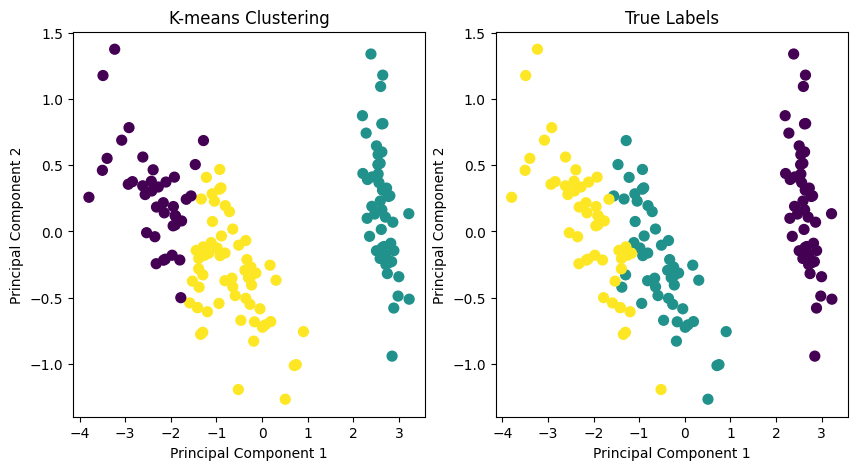

In [13]:
# Plot K-means results
utils.plot_pca_space(X_pca, labels, iris.target)

**Optional exercise:**
Evaluate the results obtained in part 1, by transforming the data and displaying it (in the latent space) using the obtained clusters. Test with different values of K and display the results.